<a href="https://colab.research.google.com/github/kmt112/themarketanalyst/blob/master/Final_HDB_Nerual_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools
from scipy.stats import norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.stats import norm,skew
from matplotlib.pyplot import figure
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, log_loss
from sklearn import preprocessing
import io

In [5]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # this line is not required unless you are in a notebook`. This will be interpreted as: `2.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.


In [6]:
from google.colab import files
uploaded = files.upload()

Saving hdb_final.csv to hdb_final (1).csv


In [7]:
df = pd.read_csv(io.StringIO(uploaded['hdb_final.csv'].decode('cp1252')))
#df = pd.read_csv(io.BytesIO(data_to_load['Train.csv'])) #have not tried if this works

In [8]:
df

,Unnamed: 0,Town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,Year_sold,remaining_lease,Rank
0,0,ANG MO KIO,1 ROOM,4.0,31.0,Improved,1977,9000.0,1990,86,97.285714
1,1,ANG MO KIO,1 ROOM,2.0,31.0,Improved,1977,6000.0,1990,86,97.285714
2,2,ANG MO KIO,1 ROOM,4.0,31.0,Improved,1977,8000.0,1990,86,97.285714
3,3,ANG MO KIO,1 ROOM,3.0,31.0,Improved,1977,6000.0,1990,86,97.285714
4,4,ANG MO KIO,3 ROOM,2.0,73.0,New Generation,1976,47200.0,1990,85,97.285714
...,...,...,...,...,...,...,...,...,...,...,...
677109,677109,PUNGGOL,4 ROOM,5.0,95.0,Model A,2014,520000.0,2020,93,101.300000
677110,677110,PUNGGOL,5 ROOM,4.0,110.0,Premium Apartment,2005,460888.0,2020,84,101.300000
677111,677111,PUNGGOL,5 ROOM,3.0,110.0,Improved,2003,435000.0,2020,82,101.300000
677112,677112,PUNGGOL,5 ROOM,4.0,110.0,Improved,2003,460000.0,2020,82,101.300000


In [9]:
df = df.drop('Unnamed: 0', 1)
df.head()

,Town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,Year_sold,remaining_lease,Rank
0,ANG MO KIO,1 ROOM,4.0,31.0,Improved,1977,9000.0,1990,86,97.285714
1,ANG MO KIO,1 ROOM,2.0,31.0,Improved,1977,6000.0,1990,86,97.285714
2,ANG MO KIO,1 ROOM,4.0,31.0,Improved,1977,8000.0,1990,86,97.285714
3,ANG MO KIO,1 ROOM,3.0,31.0,Improved,1977,6000.0,1990,86,97.285714
4,ANG MO KIO,3 ROOM,2.0,73.0,New Generation,1976,47200.0,1990,85,97.285714


## Neural Network

We will now start modelling. We have yet to standardize the model

In [10]:
from sklearn.model_selection import train_test_split
df_final=pd.get_dummies(df)

In [11]:
df_final

,storey_range,floor_area_sqm,lease_commence_date,resale_price,Year_sold,remaining_lease,Rank,Town_ANG MO KIO,Town_BEDOK,Town_BISHAN,Town_BUKIT BATOK,Town_BUKIT MERAH,Town_BUKIT PANJANG,Town_BUKIT TIMAH,Town_CENTRAL AREA,Town_CHOA CHU KANG,Town_CLEMENTI,Town_GEYLANG,Town_HOUGANG,Town_JURONG EAST,Town_JURONG WEST,Town_KALLANG/WHAMPOA,Town_LIM CHU KANG,Town_MARINE PARADE,Town_PASIR RIS,Town_PUNGGOL,Town_QUEENSTOWN,Town_SEMBAWANG,Town_SENGKANG,Town_SERANGOON,Town_TAMPINES,Town_TOA PAYOH,Town_WOODLANDS,Town_YISHUN,flat_type_1 ROOM,flat_type_2 ROOM,flat_type_3 ROOM,flat_type_4 ROOM,flat_type_5 ROOM,flat_type_EXECUTIVE,flat_type_MULTI-GENERATION,flat_model_2-room,flat_model_Adjoined flat,flat_model_Apartment,flat_model_DBSS,flat_model_Improved,flat_model_Improved-Maisonette,flat_model_Maisonette,flat_model_Model A,flat_model_Model A-Maisonette,flat_model_Model A2,flat_model_Multi Generation,flat_model_New Generation,flat_model_Premium Apartment,flat_model_Premium Apartment Loft,flat_model_Premium Maisonette,flat_model_Simplified,flat_model_Standard,flat_model_Terrace,flat_model_Type S1,flat_model_Type S2
0,4.0,31.0,1977,9000.0,1990,86,97.285714,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2.0,31.0,1977,6000.0,1990,86,97.285714,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4.0,31.0,1977,8000.0,1990,86,97.285714,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3.0,31.0,1977,6000.0,1990,86,97.285714,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2.0,73.0,1976,47200.0,1990,85,97.285714,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677109,5.0,95.0,2014,520000.0,2020,93,101.300000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
677110,4.0,110.0,2005,460888.0,2020,84,101.300000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
677111,3.0,110.0,2003,435000.0,2020,82,101.300000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
677112,4.0,110.0,2003,460000.0,2020,82,101.300000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
df_final.columns

Index(['storey_range', 'floor_area_sqm', 'lease_commence_date', 'resale_price',
       'Year_sold', 'remaining_lease', 'Rank', 'Town_ANG MO KIO', 'Town_BEDOK',
       'Town_BISHAN', 'Town_BUKIT BATOK', 'Town_BUKIT MERAH',
       'Town_BUKIT PANJANG', 'Town_BUKIT TIMAH', 'Town_CENTRAL AREA',
       'Town_CHOA CHU KANG', 'Town_CLEMENTI', 'Town_GEYLANG', 'Town_HOUGANG',
       'Town_JURONG EAST', 'Town_JURONG WEST', 'Town_KALLANG/WHAMPOA',
       'Town_LIM CHU KANG', 'Town_MARINE PARADE', 'Town_PASIR RIS',
       'Town_PUNGGOL', 'Town_QUEENSTOWN', 'Town_SEMBAWANG', 'Town_SENGKANG',
       'Town_SERANGOON', 'Town_TAMPINES', 'Town_TOA PAYOH', 'Town_WOODLANDS',
       'Town_YISHUN', 'flat_type_1 ROOM', 'flat_type_2 ROOM',
       'flat_type_3 ROOM', 'flat_type_4 ROOM', 'flat_type_5 ROOM',
       'flat_type_EXECUTIVE', 'flat_type_MULTI-GENERATION',
       'flat_model_2-room', 'flat_model_Adjoined flat', 'flat_model_Apartment',
       'flat_model_DBSS', 'flat_model_Improved',
       'flat_model

In [13]:
# split into input (X) and output (Y) variables
y_list =['resale_price']
x_list =[x for x in df_final.columns if x not in y_list]
X = df_final[x_list]
Y = df_final[y_list]

In [14]:
print(X.head())
print(Y.head())

   storey_range  floor_area_sqm  ...  flat_model_Type S1  flat_model_Type S2
0           4.0            31.0  ...                   0                   0
1           2.0            31.0  ...                   0                   0
2           4.0            31.0  ...                   0                   0
3           3.0            31.0  ...                   0                   0
4           2.0            73.0  ...                   0                   0

[5 rows x 60 columns]
   resale_price
0        9000.0
1        6000.0
2        8000.0
3        6000.0
4       47200.0


## Modelling

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor

In [16]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
#scaler=MinMaxScaler()
X_final= X
Y_final = Y
#Y_final= scaler.fit_transform(Y)
#X_final = pd.DataFrame(X_final, columns = X.columns) 
#Y_final = pd.DataFrame(Y_final, columns = Y.columns)

In [17]:
Y_final

,resale_price
0,9000.0
1,6000.0
2,8000.0
3,6000.0
4,47200.0
...,...
677109,520000.0
677110,460888.0
677111,435000.0
677112,460000.0


In [18]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedKFold

In [19]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_squared_log_error
from math import sqrt

import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [20]:
#kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7) for multiclass classification problem
rkf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=998)
cv_MSE_scores = []
cv_MAE_scores = []
cv_MSLE_scores = []
cv_MAPE_scores = []

for train, test in rkf.split(X_final, Y_final): # try inoputting interms of array 
  model = Sequential()
  model.add(Dense(101, input_dim=60, activation= "relu"))
  model.add(Dense(60, activation= "relu"))
  model.add(Dense(1))
  model.summary() #Print model Summary
    #compile
  model.compile(loss= "mean_absolute_error" , optimizer="adam", metrics=["mean_squared_error","mean_absolute_error","mean_squared_logarithmic_error","MeanAbsolutePercentageError"])
    #scale
  scaler=MinMaxScaler()
  scaler.fit(X_final.iloc[train])
  Xtrain = scaler.transform(X_final.iloc[train])
  Xtest= scaler.transform(X_final.iloc[test])
  scaler.fit(Y_final.iloc[train])
  Ytrain = scaler.transform(Y_final.iloc[train])

	#Fit the model
  model.fit(Xtrain, Ytrain, epochs=2, batch_size=10, verbose=0)
  #evaluate the model
  y_results = model.predict(Xtest)
  y_results = scaler.inverse_transform(y_results)
  #scores = model.evaluate(Xtest, scaler.transform(Y_final.iloc[test]), verbose=0)
  #print("%s: %.5f" % (model.metrics_names[1], scores[1]))
  #print("%s: %.5f" % (model.metrics_names[2], scores[2]))
  #print("%s: %.5f" % (model.metrics_names[3], scores[3]))
  #print("%s: %.5f" % (model.metrics_names[4], scores[4]))
  cv_MSE_scores.append(mean_squared_error(Y_final.iloc[test], y_results ))
  cv_MAE_scores.append(mean_absolute_error(Y_final.iloc[test], y_results))
  cv_MSLE_scores.append(mean_squared_log_error(Y_final.iloc[test], abs(y_results)))
  cv_MAPE_scores.append(mean_absolute_percentage_error(Y_final.iloc[test], y_results))
  #predict

  print('Mean Squared Error :',mean_squared_error(Y_final.iloc[test], y_results ))
  print('Mean Absolute Error :',mean_absolute_error(Y_final.iloc[test], y_results))
  print('RMSLE: ', mean_squared_log_error(Y_final.iloc[test], abs(y_results)))
  print('MAPE: ', mean_absolute_percentage_error(Y_final.iloc[test], y_results))


print("%.5f (+/- %.5f)" % (np.mean(cv_MSE_scores), np.std(cv_MSE_scores)))
print("%.5f (+/- %.5f)" % (np.mean(cv_MAE_scores), np.std(cv_MAE_scores)))
print("%.5f (+/- %.5f)" % (np.mean(cv_MSLE_scores), np.std(cv_MSLE_scores)))
print("%.5f (+/- %.5f)" % (np.mean(cv_MAPE_scores), np.std(cv_MAPE_scores)))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 101)               6161      
_________________________________________________________________
dense_1 (Dense)              (None, 60)                6120      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 61        
Total params: 12,342
Trainable params: 12,342
Non-trainable params: 0
_________________________________________________________________
Mean Squared Error : 1081345911.3434794
Mean Absolute Error : 23431.7510324695
RMSLE:  0.018003301666937973
MAPE:  9.540449825003629
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 101)               6161      
_____________________________

In [1]:
print("Mean squared Error %.5f (+/- %.5f)" % (np.mean(cv_MSE_scores), np.std(cv_MSE_scores)))
print("Mean Absolute Error %.5f (+/- %.5f)" % (np.mean(cv_MAE_scores), np.std(cv_MAE_scores)))
print("Mean Squared Logirithmic Error %.5f (+/- %.5f)" % (np.mean(cv_MSLE_scores), np.std(cv_MSLE_scores)))
print("Mean Absolute Error %.5f (+/- %.5f)" % (np.mean(cv_MAPE_scores), np.std(cv_MAPE_scores)))

NameError: ignored

In [22]:
y_test_inv=scaler.inverse_transform([cv_MAE_scores])

In [23]:
print(np.mean(y_test_inv))
print(np.std(y_test_inv))

27922025190.081585
701295845.4590982


Model Graphs

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_final, Y_final)

In [ ]:
print(X_train.shape)
print(y_train)

(507835, 60)
        resale_price
403184      340000.0
449989      200000.0
203972       80000.0
612790      482000.0
317546      403000.0
...              ...
232564      170000.0
220652      215000.0
479159      275000.0
311376      335000.0
173379       98000.0

[507835 rows x 1 columns]


In [ ]:
y_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
X_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [ ]:
# Define model
model = Sequential()
model.add(Dense(101, input_dim=60, activation= "relu"))
model.add(Dense(60, activation= "relu"))
model.add(Dense(1))
model.summary() #Print model Summary


Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_72 (Dense)             (None, 101)               6161      
_________________________________________________________________
dense_73 (Dense)             (None, 60)                6120      
_________________________________________________________________
dense_74 (Dense)             (None, 1)                 61        
Total params: 12,342
Trainable params: 12,342
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss= "mean_squared_error" , optimizer="adam", metrics=["mean_squared_error","mean_absolute_error","mean_squared_logarithmic_error","MeanAbsolutePercentageError"])

In [ ]:
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
y_train=scaler.fit_transform(y_train)


In [ ]:
X_test

array([[0.0625    , 0.14498141, 0.36734694, ..., 0.        , 0.        ,
        0.        ],
       [0.0625    , 0.28624535, 0.36734694, ..., 0.        , 0.        ,
        0.        ],
       [0.1875    , 0.14498141, 0.36734694, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.125     , 0.41635688, 0.34693878, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.26022305, 0.28571429, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.13754647, 0.18367347, ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
history = model.fit(X_train, y_train, epochs=50,validation_split=0.2,batch_size=20, verbose=1)

Epoch 1/50
20314/20314 [==============================] - 32s 2ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - mean_absolute_error: 0.0254 - mean_squared_logarithmic_error: 7.6664e-04 - mean_absolute_percentage_error: 95.1816 - val_loss: 7.0667e-04 - val_mean_squared_error: 7.0667e-04 - val_mean_absolute_error: 0.0194 - val_mean_squared_logarithmic_error: 4.1871e-04 - val_mean_absolute_percentage_error: 10.2773
Epoch 2/50
20314/20314 [==============================] - 32s 2ms/step - loss: 7.0595e-04 - mean_squared_error: 7.0595e-04 - mean_absolute_error: 0.0191 - mean_squared_logarithmic_error: 4.1813e-04 - mean_absolute_percentage_error: 106.9220 - val_loss: 7.7680e-04 - val_mean_squared_error: 7.7680e-04 - val_mean_absolute_error: 0.0194 - val_mean_squared_logarithmic_error: 4.4797e-04 - val_mean_absolute_percentage_error: 9.8145
Epoch 3/50
20314/20314 [==============================] - 33s 2ms/step - loss: 6.4686e-04 - mean_squared_error: 6.4686e-04 - mean_absolute_error: 0.01

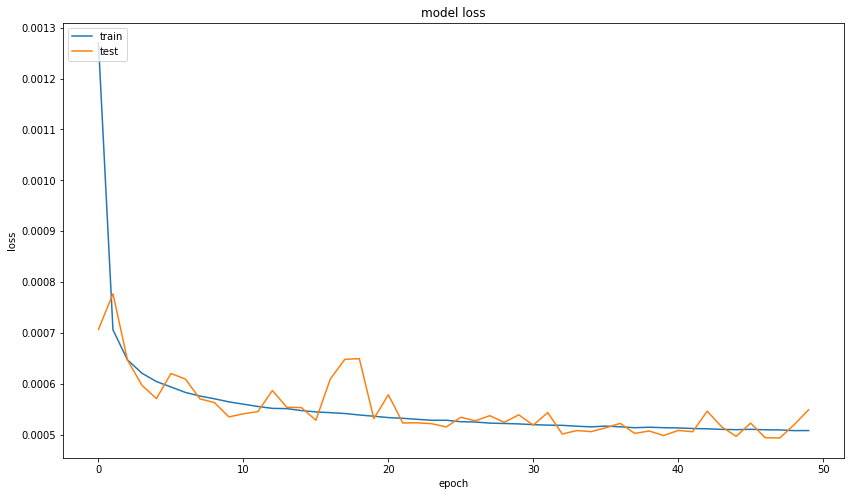

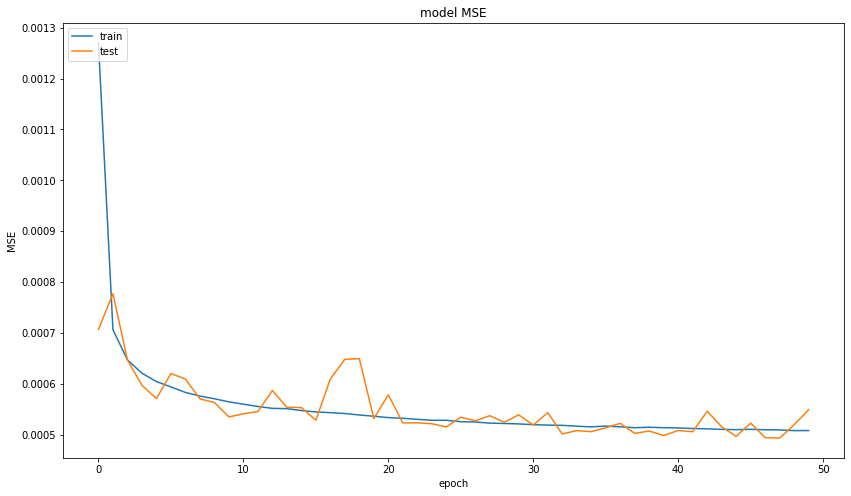

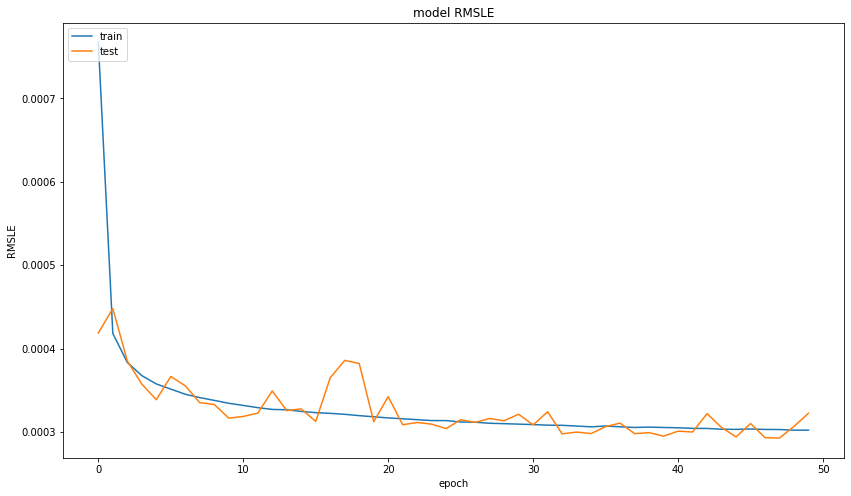

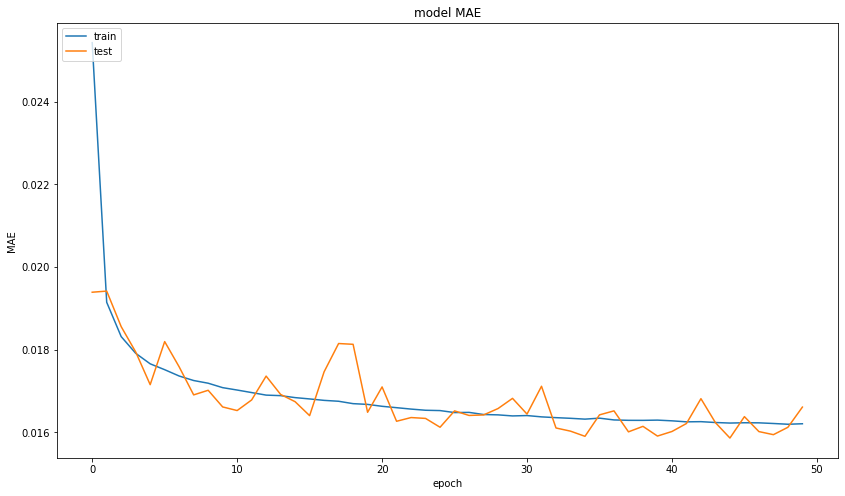

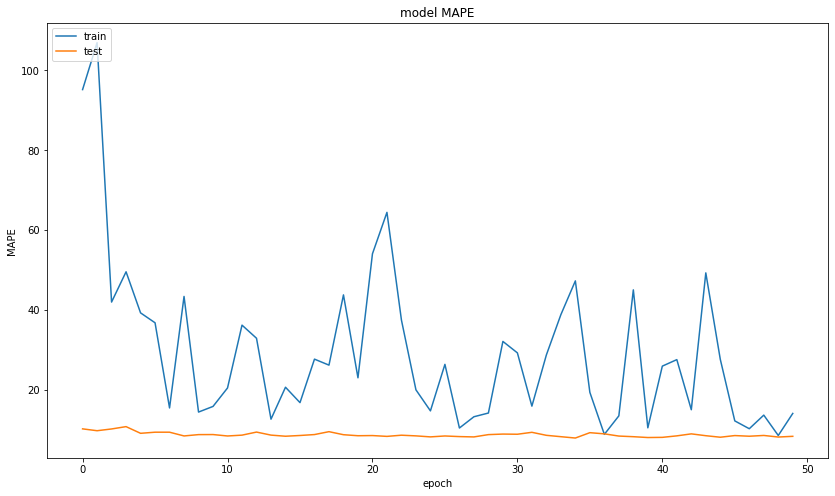

In [ ]:
plt.figure(figsize=(14,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#summarize history for RMSE
plt.figure(figsize=(14,8))
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('model MSE')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#summarize history for RMSLE
plt.figure(figsize=(14,8))
plt.plot(history.history['mean_squared_logarithmic_error'])
plt.plot(history.history['val_mean_squared_logarithmic_error'])
plt.title('model RMSLE')
plt.ylabel('RMSLE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#summarize history for MAE
plt.figure(figsize=(14,8))
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model MAE')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#summarize history for MAE
plt.figure(figsize=(14,8))
plt.plot(history.history['mean_absolute_percentage_error'])
plt.plot(history.history['val_mean_absolute_percentage_error'])
plt.title('model MAPE')
plt.ylabel('MAPE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


## Validation

In [ ]:
y_test_nn = model.predict(X_test)
y_test_nn

array([[0.12551227],
       [0.17036036],
       [0.06793197],
       ...,
       [0.36851186],
       [0.18270361],
       [0.1100893 ]], dtype=float32)

In [ ]:
y_test_nn_inv=scaler.inverse_transform(y_test_nn)
y_test_nn_inv

array([[159615.7 ],
       [214612.9 ],
       [ 89004.98],
       ...,
       [457606.06],
       [229749.45],
       [140702.52]], dtype=float32)

In [ ]:
y_test_nn_inv_abs=abs(y_test_nn_inv)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_squared_log_error
from math import sqrt
#(y_test_inv,y_test_nn_final)
print('Mean Squared Error :',mean_squared_error(y_test_inv, y_test_nn_inv ))
print('Mean Absolute Error :',mean_absolute_error(y_test_inv, y_test_nn_inv))
#print('R^2 :',r2_score(y_test_inv, y_test_nn_inv))
print('RMSLE: ', mean_squared_log_error(y_test_inv, y_test_nn_inv_abs))

Mean Squared Error : 1.5485459093251633e+23
Mean Absolute Error : 351341146182.0096
RMSLE:  196.69025053533


In [ ]:
#print('Mean Squared Error :',mean_squared_error(y_test, ))
#print('Mean Absolute Error :',mean_absolute_error(y_test, y_pred_xgb))
#print('R^2 :',r2_score(y_test, y_pred_xgb))
#print('RMSLE: ', mean_squared_log_error(y_test, y_pred_xgb))

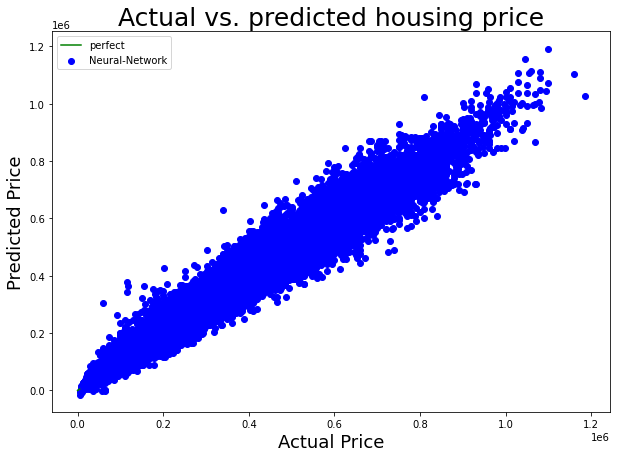

In [ ]:
plt.figure(figsize=(10,7))
plt.title("Actual vs. predicted housing price",fontsize=25)
plt.xlabel("Actual Price",fontsize=18)
plt.ylabel("Predicted Price", fontsize=18)
plt.scatter(x=y_test_inv,y=y_test_nn_inv, c='b', label='Neural-Network')
plt.plot([0,5000], [0,5000], '-g', label='perfect')
plt.legend(loc='upper left')
plt.show()



# model Explanation: shapley value

In [ ]:
pip install shap

     |████████████████████████████████| 327kB 2.8MB/s 
  Created wheel for shap: filename=shap-0.36.0-cp36-cp36m-linux_x86_64.whl size=456466 sha256=6096d4c62f62729cdbcb16681c7ec6ee41d738c3d65b2b5685c5013250de7f8f
  Stored in directory: /root/.cache/pip/wheels/fb/15/e1/8f61106790da27e0765aaa6e664550ca2c50ea339099e799f4
Successfully built shap


In [ ]:
X_train

,storey_range,floor_area_sqm,lease_commence_date,Year_sold,remaining_lease,Rank,Town_ANG MO KIO,Town_BEDOK,Town_BISHAN,Town_BUKIT BATOK,Town_BUKIT MERAH,Town_BUKIT PANJANG,Town_BUKIT TIMAH,Town_CENTRAL AREA,Town_CHOA CHU KANG,Town_CLEMENTI,Town_GEYLANG,Town_HOUGANG,Town_JURONG EAST,Town_JURONG WEST,Town_KALLANG/WHAMPOA,Town_LIM CHU KANG,Town_MARINE PARADE,Town_PASIR RIS,Town_PUNGGOL,Town_QUEENSTOWN,Town_SEMBAWANG,Town_SENGKANG,Town_SERANGOON,Town_TAMPINES,Town_TOA PAYOH,Town_WOODLANDS,Town_YISHUN,flat_type_1 ROOM,flat_type_2 ROOM,flat_type_3 ROOM,flat_type_4 ROOM,flat_type_5 ROOM,flat_type_EXECUTIVE,flat_type_MULTI-GENERATION,flat_model_2-room,flat_model_Adjoined flat,flat_model_Apartment,flat_model_DBSS,flat_model_Improved,flat_model_Improved-Maisonette,flat_model_Maisonette,flat_model_Model A,flat_model_Model A-Maisonette,flat_model_Model A2,flat_model_Multi Generation,flat_model_New Generation,flat_model_Premium Apartment,flat_model_Premium Apartment Loft,flat_model_Premium Maisonette,flat_model_Simplified,flat_model_Standard,flat_model_Terrace,flat_model_Type S1,flat_model_Type S2
0,0.1250,0.293907,0.714286,0.700000,0.897959,0.571348,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0000,0.293907,0.714286,0.666667,0.918367,0.594329,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0625,0.333333,0.387755,0.133333,0.918367,0.659755,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.1250,0.426523,0.489796,0.466667,0.816327,0.561891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.1250,0.139785,0.244898,0.500000,0.551020,0.641847,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507830,0.0625,0.182796,0.367347,0.200000,0.857143,0.496701,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
507831,0.2500,0.118280,0.346939,0.300000,0.775510,0.496701,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
507832,0.1875,0.215054,0.387755,0.233333,0.857143,0.659755,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
507833,0.1250,0.272401,0.591837,0.900000,0.653061,0.561891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_train.iloc[np.random.choice(X_train.shape[0],100, replace=True)]

,storey_range,floor_area_sqm,lease_commence_date,Year_sold,remaining_lease,Rank,Town_ANG MO KIO,Town_BEDOK,Town_BISHAN,Town_BUKIT BATOK,Town_BUKIT MERAH,Town_BUKIT PANJANG,Town_BUKIT TIMAH,Town_CENTRAL AREA,Town_CHOA CHU KANG,Town_CLEMENTI,Town_GEYLANG,Town_HOUGANG,Town_JURONG EAST,Town_JURONG WEST,Town_KALLANG/WHAMPOA,Town_LIM CHU KANG,Town_MARINE PARADE,Town_PASIR RIS,Town_PUNGGOL,Town_QUEENSTOWN,Town_SEMBAWANG,Town_SENGKANG,Town_SERANGOON,Town_TAMPINES,Town_TOA PAYOH,Town_WOODLANDS,Town_YISHUN,flat_type_1 ROOM,flat_type_2 ROOM,flat_type_3 ROOM,flat_type_4 ROOM,flat_type_5 ROOM,flat_type_EXECUTIVE,flat_type_MULTI-GENERATION,flat_model_2-room,flat_model_Adjoined flat,flat_model_Apartment,flat_model_DBSS,flat_model_Improved,flat_model_Improved-Maisonette,flat_model_Maisonette,flat_model_Model A,flat_model_Model A-Maisonette,flat_model_Model A2,flat_model_Multi Generation,flat_model_New Generation,flat_model_Premium Apartment,flat_model_Premium Apartment Loft,flat_model_Premium Maisonette,flat_model_Simplified,flat_model_Standard,flat_model_Terrace,flat_model_Type S1,flat_model_Type S2
72315,0.0000,0.258065,0.653061,0.866667,0.734694,0.562677,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
396208,0.4375,0.322581,0.306122,0.700000,0.489796,0.618647,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
80389,0.3125,0.326165,0.285714,0.566667,0.551020,0.641847,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
266713,0.1250,0.200717,0.448980,0.200000,0.938776,0.663354,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
427428,0.0625,0.372760,0.387755,0.233333,0.857143,0.639962,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227419,0.1875,0.272401,0.469388,0.500000,0.775510,0.669651,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
144296,0.0000,0.050179,0.102041,0.633333,0.326531,0.725730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
459820,0.1250,0.523297,0.591837,0.333333,1.000000,0.618647,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
453526,0.2500,0.279570,0.387755,0.200000,0.877551,0.681747,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
import shap
#import tf.keras.backend 
background = X_train.iloc[np.random.choice(X_train.shape[0], 100, replace=False)]# we use the first 100 training examples as our background dataset to integrate over
explainer = shap.DeepExplainer(model, background.values)

keras is no longer supported, please use tf.keras instead.


Instructions for updating:
Simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


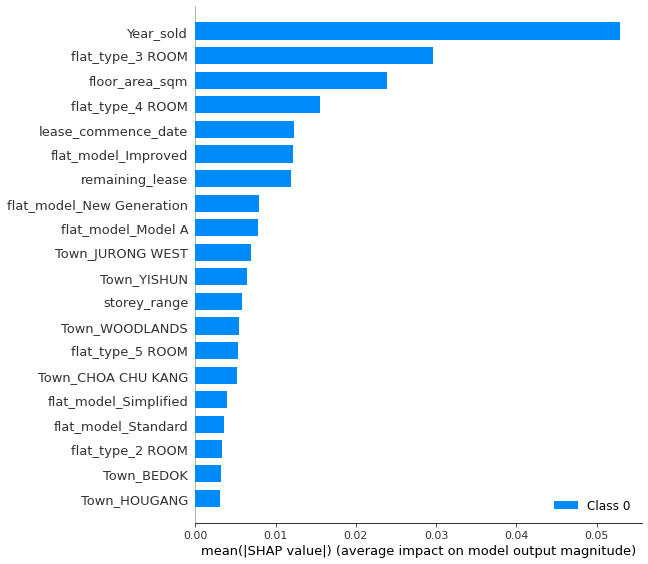

In [ ]:
import shap
shap.initjs()
explainer = shap.DeepExplainer(model, X_train[:100].values)
shap_values = explainer.shap_values(X_test[:100].values)
shap.summary_plot(shap_values, X_test, plot_type='bar')

In [ ]:
ax=list(X.columns)

In [ ]:
explainer = shap.Explainer(model, X_train[:100].values,output_names=ax)
shap_values = explainer(X_test[:100].values)


Permutation explainer: 101it [00:27,  3.67it/s]


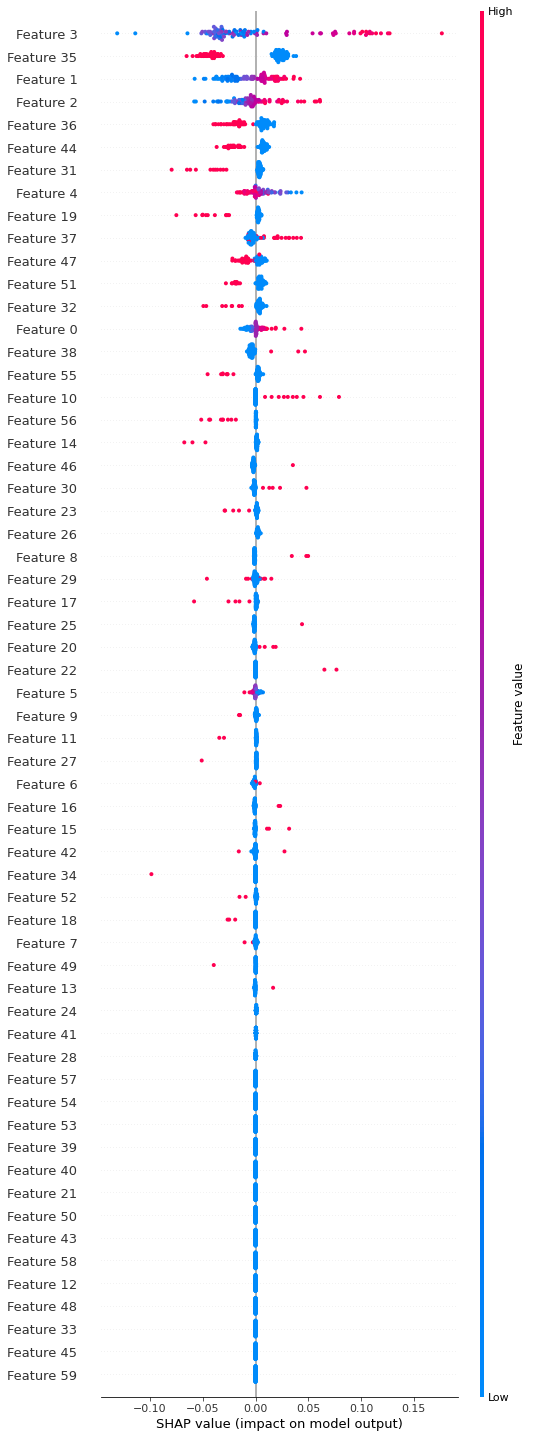

In [ ]:
shap.plots.beeswarm(shap_values,max_display=1)

In [ ]:
# get a list of names for future iterations
Year=df['Year_sold'].unique().tolist()
bx=pd.DataFrame()
for x in Year:
    #ax[x]=df[df.Year_sold < df.Year_sold.quantile(.75)]
    ax=df[df['Year_sold'] == x]
    ax=ax[ax.resale_price > ax.resale_price.quantile(0.75)]
    bx=bx.append(ax) # to be exported to Tableau for analysis

In [ ]:
bx 

,Town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,Year_sold,remaining_lease,Rank
107,ANG MO KIO,4 ROOM,4.0,92.0,New Generation,1976,86000.0,1990,85,97.285714
111,ANG MO KIO,4 ROOM,2.0,98.0,New Generation,1978,90000.0,1990,87,97.285714
112,ANG MO KIO,4 ROOM,4.0,98.0,New Generation,1978,90000.0,1990,87,97.285714
113,ANG MO KIO,4 ROOM,4.0,98.0,New Generation,1978,93000.0,1990,87,97.285714
124,ANG MO KIO,4 ROOM,4.0,92.0,New Generation,1979,87000.0,1990,88,97.285714
...,...,...,...,...,...,...,...,...,...,...
677094,PUNGGOL,5 ROOM,5.0,115.0,Premium Apartment,2013,675000.0,2020,92,101.300000
677095,PUNGGOL,5 ROOM,3.0,112.0,Improved,2015,608888.0,2020,94,101.300000
677096,PUNGGOL,EXECUTIVE,1.0,130.0,Premium Apartment,2003,530000.0,2020,82,101.300000
677108,PUNGGOL,4 ROOM,4.0,93.0,Premium Apartment,2014,530000.0,2020,93,101.300000
